# Lezione 08

## Dario Pullia

Il valore di aspettazione di una Hamiltoniana misurato su un sufficiente numero di stati di prova ha il valore del minimo $E_0$ come limite inferiore:
$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$

Cerchiamo in questa esercitazione di ricercare il **minimo** di un potenziale 1D nella forma:

$$
V(x) = x^4 - \frac{5}{2}x^2
$$

Cerchiamo di risolvere questo problema con metodi numerici, immaginando una soluzione approssimata nella forma della somma di due gaussiane:
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

Pertanto $\Psi_T^{\sigma,\mu}(x)$ dipende da **due parametri variazionali**: $\sigma$ e $\mu$.



Per misurare il valore di aspettazione di H è necessario saper calcolare l'energia data una una funzione d'onda

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$


Per la ricerca del minimo utilizziamo la tecnica del **Simulated Annealing**.
Questa tecnica è facilmente comprensibile immaginando un sistema caldo di particelle che viene fatto raffreddare: se lo si raffredda troppo rapidamente le particelle assumeranno una configurazione vetrosa in un minimo locale non ottimale, al contrario se il raffreddamento avviene in modo lento alla fine il sistema sarà in una struttura cristallina ordinata, che corrisponde a un minimo profondo dell'energia.


Sottolineo che nel nostro caso la **temperatura corrisponde alla variabilità dei parametri $\sigma$ e $\mu$, non alla mobilità del punto lungo il suo cammino di Markov nel potenziale**. 


#### La classe Metropolis
Nel nostro caso implementiamo l'algoritmo di Metropolis in una classe analoga a quella del problema 5. 

La classe metropolis, per le necessità attuali, deve permettere di muoversi seguendo i passi di Metropolis e di estrarre l'energia puntuale in cui si trova.
Di più in seguito



### Esercizio 08.1

Siccome saranno necessarie molteplici misure di  $\langle {\hat H} \rangle_T$, testiamo la classe Metropolis al fine di decidere il **minimo** numero di passi da eseguire per ogni misura. 


Procediamo facendo data blocking fissati i parametri target $\sigma$ e $\mu$ arbitrariamente pari a 1. Questo valore, sicuramente non ottimizzato ma entro i limiti della ragionevolezza, ci aspettiamo non influisca troppo nel numero di passi necessari per misura.

Scegliamo M=100000 passi divisi in N=100 blocchi.

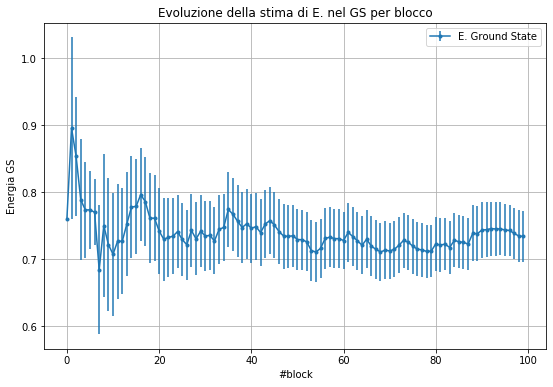

In [18]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import LineCollection

N=100
E, ErrorE = np.loadtxt("data01/data01.dat",  usecols=(0,1), delimiter=' ', unpack='true')
x = np.arange(N) 

fig=plt.figure(figsize=(9, 6))

plt.errorbar(x,E,marker=".", yerr=ErrorE, label="E. Ground State")
plt.title("Evoluzione della stima di E. nel GS per blocco")
plt.xlabel('#block')
plt.ylabel('Energia GS')
#plt.axhline(y = -0.46046587969271513, color = 'r', linestyle = '-',label="Expected value")
plt.grid(True)
plt.legend()
plt.show()

La precisione così ottenuta è buona, pertanto scegliamo di mantenere questo valore di M ed N.

### Esercizio 08.2

Il problema ora diventa studiare **l'andamento del sistema** in funzione dei parametri variazionali, di fatto rendendo l'esercizio precedente la misura dell'energia per l'accettazione ($A(\nu|\mu)=min \left [1, \frac{p(\nu)}{p(\mu)} \right ]=min \left [1, {e^{-\beta \Delta E}} \right ]$) del passo di un **macro-Metropolis che cammina in uno spazio $\sigma-\mu$** con un potenziale con 4 minimi identici (dipendenza da $\sigma^2$ e $\mu^2$).


Lungo questo macro-Metropolis ci muoviamo 40 passi a partire da $(\sigma,\mu)=(1,1)$ con passo uniforme $\sigma \Rightarrow \sigma' \in [\sigma-1/\beta,\sigma+1/\beta]$, $\mu \Rightarrow \mu' \in [\mu-1/\beta,\mu+1/\beta]$ dove $\beta=1$. 
L'annealing si esegue ciclicamente (50 cicli), ogni 40 passi, abbassando la temperatura, quindi aumentando $\beta = \beta+1.5$.

In questo modo si permette al sistema di esplorare inizialmente una vasta regione nel piano $\sigma-\mu$ e progressivamente di cadere nel minimo ricercato.

#### Implementazione

A questo punto, di fatto, racchiudiamo l'esercizio precendente in una funzione **MeasureH**. 

Per efficientare il processo, siccome la vicinanza al minimo diminuisce la varianza delle misure di H e quindi ne accelera la convergenza, introduciamo un controllo per cui il data blocking può interrompersi prima del completamento di 100 blocchi se l'errore relativo sulla misura di energia è inferiore al 1%.


Plottiamo l'evoluzione dell'energia durante il SA. In particolare è rappresentata l'energia misurata prima di ogni abbassamento di temperatura.

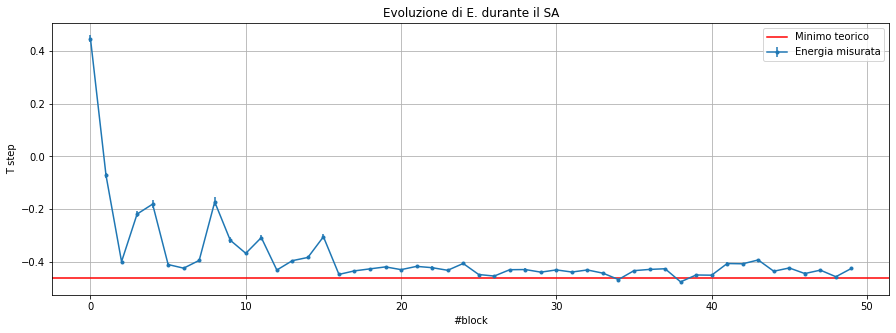

In [19]:
E, ErrorE = np.loadtxt("data02/data02.dat", usecols=(0,1), delimiter=' ', unpack='true')
x = np.arange(50) 
fig=plt.figure(figsize=(15, 5))

plt.errorbar(x,E, yerr=ErrorE,marker=".", label="Energia misurata")
plt.title("Evoluzione di E. durante il SA")
plt.xlabel('#block')
plt.ylabel('T step')
plt.axhline(y = -0.46046587969271513, color = 'r', linestyle = '-',label="Minimo teorico")
plt.grid(True)
plt.legend()
plt.show()

Notiamo che il minimo teorico non è mai raggiunto siccome questo è un **limite inferiore** all'energia. In realtà, essendo la misura di E. di tipo stocastico e quindi soggetta ad errore, esistono rari casi in cui si va sotto il valore del minimo reale.

Studiamo ora il percorso del punto $(\sigma,\mu)$ nel piano durante il raffreddamento.

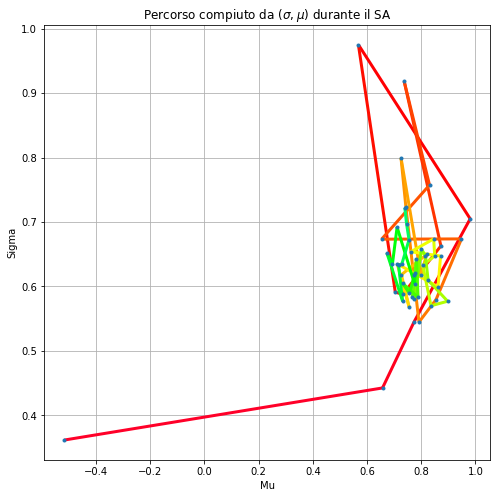

In [20]:
Mu, Sig = np.loadtxt("data02/data02_MuSig.dat", usecols=(0,1), delimiter=' ', unpack='true')

fig=plt.figure(figsize=(8,8))

plt.plot(Mu, Sig,marker=".", linewidth=0)
plt.title("Percorso compiuto da $(\sigma,\mu)$ durante il SA")
plt.xlabel('Mu')
plt.ylabel('Sigma')
plt.grid(True)
#plt.legend()
points = np.array([Mu, Sig]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc = LineCollection(segments, cmap=plt.get_cmap('gist_rainbow'),
    norm=plt.Normalize(0, N))
lc.set_array(x)
lc.set_linewidth(3)
plt.gca().add_collection(lc)

plt.show()

A questo punto, fissiamo la temperatura e facciamo evolvere il sistema per misurare precisamente i valori ottimali di $(\sigma,\mu)$ usando il data-blocking (M=40000 punti in N=100 blocchi).

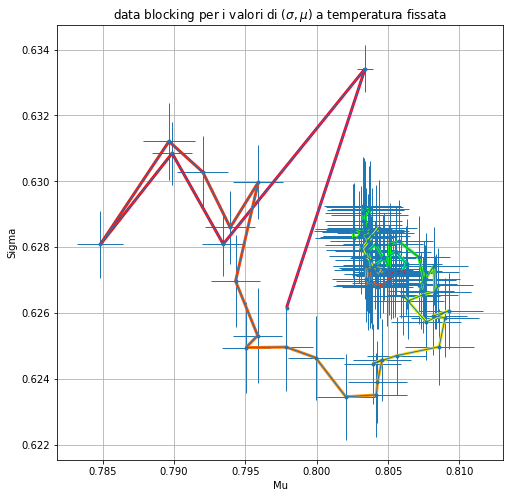

In [21]:
MuFinal, MuFinalErr, SigFinal, SigFinalErr = np.loadtxt("data02/data02_MuSigFinal.dat", usecols=(0,1,2,3), delimiter=' ', unpack='true')

fig=plt.figure(figsize=(8,8))

plt.errorbar(MuFinal, SigFinal,yerr=SigFinalErr,xerr=MuFinalErr,marker=".", linewidth=1)
plt.title("data blocking per i valori di $(\sigma,\mu)$ a temperatura fissata")
plt.xlabel('Mu')
plt.ylabel('Sigma')
plt.grid(True)
#plt.legend()
points = np.array([MuFinal, SigFinal]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc = LineCollection(segments, cmap=plt.get_cmap('gist_rainbow'),
    norm=plt.Normalize(0, N))
lc.set_array(x)
lc.set_linewidth(3)
plt.gca().add_collection(lc)

plt.show()

In quanto immagine interessante, mostro tutte le coppie $(\sigma,\mu)$ esplorate durante il data-blocking. Si può notare che l'esplorazione rimane significativa nonostante la bassa mobilità concessa al sistema.

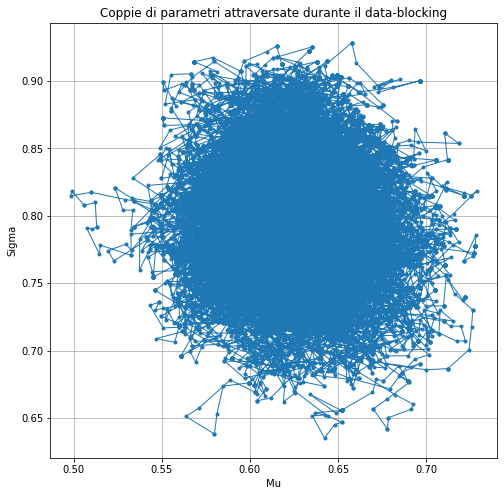

In [23]:
MuInsta, SigInsta = np.loadtxt("data02/data02_MuSigInstant.dat", usecols=(0,1,), delimiter=' ', unpack='true')

x = np.arange(40000) 
fig=plt.figure(figsize=(8,8))
plt.plot(SigInsta, MuInsta,marker=".", linewidth=1)
plt.title("Coppie di parametri attraversate durante il data-blocking")
plt.xlabel('Mu')
plt.ylabel('Sigma')
plt.grid(True)
#plt.legend()


plt.show()

Facciamo data-blocking per misurare l'energia fissando  $(\sigma,\mu)$ nei loro valori ottimali appena misurati.

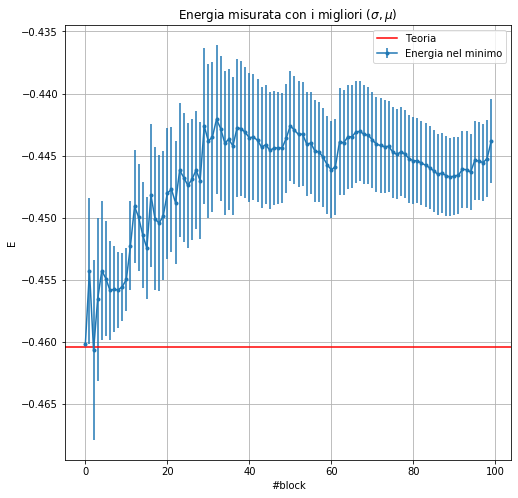

In [24]:
EFin, ErrorEFin = np.loadtxt("data02/data02_EnergyOPT.dat", usecols=(0,1), delimiter=' ', unpack='true')
x = np.arange(100) 

fig=plt.figure(figsize=(8,8))
plt.title("Energia misurata con i migliori $(\sigma,\mu)$ ")

plt.errorbar(x,EFin,marker=".", yerr=ErrorEFin, label="Energia nel minimo")
plt.axhline(y = -0.46046587969271513, color = 'r', linestyle = '-',label="Teoria")
plt.ylabel('E')
plt.xlabel('#block')
plt.grid(True)
plt.legend()
plt.show()

L'energia misurata risulta sistematicamente maggiore del minimo teorico. Questo è comprensibili dato che i parametri $(\sigma,\mu)$ non sono necessariamente i valori ottimali.

Di seguito, al fine di valutare la bontà del campionamento effettuato, confrontiamo l'istogramma delle posizioni istantanee assunte dal Metropolis con la previsione ottenuta analiticamente.


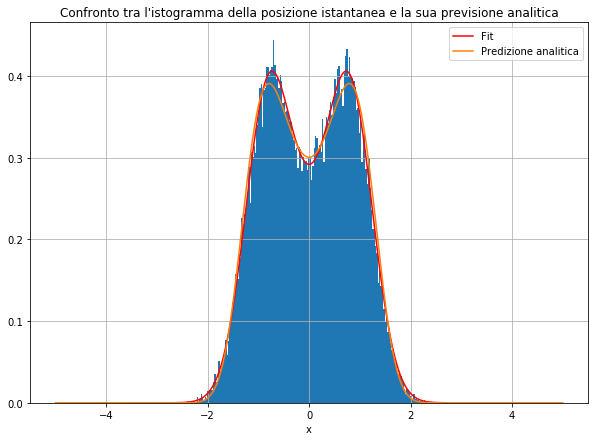

In [29]:
XInsta = np.loadtxt("data02/data02_XInstant.dat", usecols=(0,), delimiter=' ', unpack='true')


def PSI2(x,N,mu, sig):
    return N*((np.exp(-((x-mu)**2/(2*sig**2))))+(np.exp(-((x+mu)**2/(2*sig**2)))))**2
    

plt.figure(figsize=(10,7))
    
    
x=plt.hist(XInsta,bins=200, density='true')
x_interval_for_fit = np.linspace(x[1][0], x[1][-1], 200)
popt, pcov = curve_fit(PSI2, x_interval_for_fit, x[0])

plt.plot(x_interval_for_fit,PSI2(x_interval_for_fit,*popt), color='red', label='Fit')

#-------------------------------------
#Copia-incolla della soluzione del prof
#-------------------------------------
def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

# Plot a few things
scale = 0.3
plt.plot(x,(psi[0])**2, label='Predizione analitica')



plt.legend()

plt.title("Confronto tra l'istogramma della posizione istantanea e la sua previsione analitica")
plt.xlabel('x')
plt.ylabel('')
plt.grid(True)
#plt.legend()
plt.show()

Si osserva una buona compatibilità tra il risultato ottenuto e la predizione analitica. In realtà osserviamo che l'istogramma fitta bene nella somma di due gaussiane che è appunto la funzione di prova che abbiamo usato. Questo grafico prova anche che quindi l'approssimazione fatta è ragionevole.